In [17]:
import pandas as pd
import numpy as np

# Introduction

## COVID data

In [2]:
covid_data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
covid_data.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


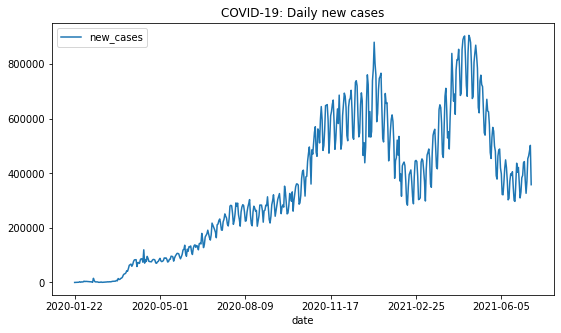

In [5]:
covid_data[(covid_data['location']=='World')].plot(x='date', y='new_cases', title='COVID-19: Daily new cases', figsize=(9, 5))

In [8]:
def covid_daily(ax):
    covid_data[(covid_data['location']=='World')].plot(x='date', y='new_cases', title='COVID-19: Daily new cases', figsize=(9, 5), ax=ax)

In [11]:
from matplotlib import pyplot as plt

def pretty_plot(chart, save=False):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

    chart(ax)
    ax.get_legend().remove()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if save:
        fig = ax.get_figure()
        fig.savefig(f'{chart.__name__}.png')

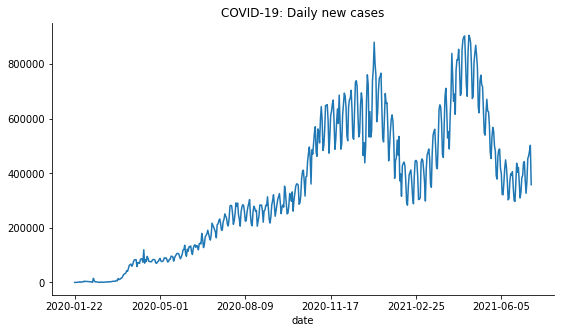

In [13]:
pretty_plot(covid_daily, save=True)

## (Gaussian) white noise

In [25]:
white_noise_data = pd.DataFrame({'Z': np.random.normal(loc=0.0, scale=10.0, size=500)})

def white_noise(ax=None):
    white_noise_data.plot(title='Gaussian white noise', figsize=(9, 5), ax = ax)

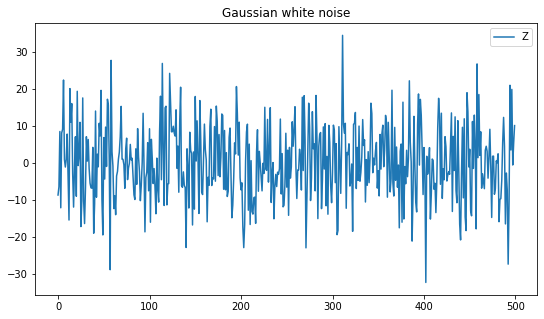

In [26]:
white_noise()

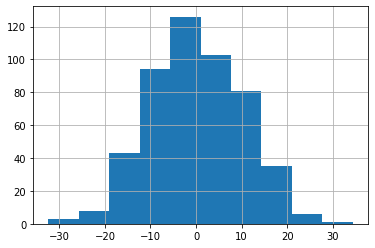

In [27]:
white_noise_data['Z'].hist()

In [28]:
!pip install pingouin
import pingouin as pg

In [29]:
# https://pingouin-stats.org/generated/pingouin.normality.html
pg.normality(white_noise_data['Z'])

,W,pval,normal
Z,0.998306,0.911821,True
